<a href="https://colab.research.google.com/github/Beccacec/FDS-Final-Project/blob/Lorenzo/FDS_final_project_Lorenzo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import csv
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


We select specific features in order to find out which of them can affect the price of the property.
So we choose features like "id", "name", "neighbourhood" (because some of them are not in specifically in the city of Rome"), "price" and others that seemed interesting for this analysis.

In [4]:
features_price = ["id","name","neighbourhood","neighbourhood_cleansed","latitude","longitude","property_type","room_type","bedrooms","beds","amenities","price","number_of_reviews_ltm","review_scores_rating"]

In [56]:
df = pd.read_csv("/content/drive/MyDrive/FDS_final_project/listings.csv", usecols = features_price)
df.head()

,id,name,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,bedrooms,beds,amenities,price,number_of_reviews_ltm,review_scores_rating
0,17629440,ISOLA DEL CUORE,"Ciampino, Lazio, Italy",VII San Giovanni/Cinecittà,41.78984,12.60899,Private room in rental unit,Private room,1.0,1.0,"[""Heating"", ""Shampoo"", ""Cleaning products"", ""H...",$45.00,8,4.74
1,2737,"Elif's room in cozy, clean flat.","Rome, Lazio, Italy",VIII Appia Antica,41.87136,12.48215,Private room,Private room,1.0,1.0,"[""First aid kit"", ""Heating"", ""Elevator"", ""Wifi...",$50.00,0,4.80
2,103870,CASACHICA Your holiday home in Rome,NaN,I Centro Storico,41.89711,12.50423,Entire rental unit,Entire home/apt,1.0,2.0,"[""Air conditioning"", ""Heating"", ""Lockbox"", ""Mi...",$78.00,30,4.11
3,2903,Stay a night in Calisto6 B&B Rome,NaN,I Centro Storico,41.88824,12.46953,Private room in bed and breakfast,Private room,1.0,2.0,"[""Air conditioning"", ""First aid kit"", ""Heating...",$164.00,0,4.28
4,104339,Colorful apartment close MetroB,"Rome, Lazio, Italy",VIII Appia Antica,41.85585,12.48361,Entire rental unit,Entire home/apt,1.0,2.0,"[""Heating"", ""Paid parking off premises"", ""Lugg...",$80.00,0,5.00


Deleting NaN values in the dataframe

In [57]:
df = df.dropna()

We want to consider only properties in the city of Rome and not the ones from Rome area but outside the city.

In [58]:
df = df.drop(df[~df['neighbourhood'].str.contains('Rome')].index)


We replace the symbol "$" with a space in the column referring to the price.

In [59]:
df["price"] = df["price"].str.replace('$','',regex = True)

In [51]:
df.head()

,id,name,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,bedrooms,beds,amenities,price,number_of_reviews_ltm,review_scores_rating,neighbourhood_id
1,2737,"Elif's room in cozy, clean flat.","Rome, Lazio, Italy",VIII Appia Antica,41.87136,12.48215,Private room,Private room,1.0,1.0,"[""First aid kit"", ""Heating"", ""Elevator"", ""Wifi...",50.0,0,4.80,8.0
4,104339,Colorful apartment close MetroB,"Rome, Lazio, Italy",VIII Appia Antica,41.85585,12.48361,Entire rental unit,Entire home/apt,1.0,2.0,"[""Heating"", ""Paid parking off premises"", ""Lugg...",80.0,0,5.00,8.0
5,3079,Cozy apartment (2-4)with Colisseum view,"Rome, Lazio, Italy",I Centro Storico,41.89500,12.49117,Entire rental unit,Entire home/apt,1.0,1.0,"[""Heating"", ""Paid parking off premises"", ""Lugg...",90.0,2,4.53,0.0
7,12398,Casa Donatello - Home far from Home,"Rome, Lazio, Italy",II Parioli/Nomentano,41.92582,12.46928,Entire rental unit,Entire home/apt,2.0,3.0,"[""50\"" HDTV with standard cable"", ""Heating"", ""...",75.0,1,4.90,1.0
10,108039,Sweet terrace by Vatican Musuem New wifi 100Mbs!,"Rome, Lazio, Italy",I Centro Storico,41.90428,12.44510,Entire rental unit,Entire home/apt,1.0,1.0,"[""Air conditioning"", ""Heating"", ""Paid parking ...",75.0,0,4.79,0.0


In [ ]:
df.head()

In [120]:
df = df[['bedrooms', 'price']]

In [121]:
model = LinearRegression()

In [122]:
model.fit(df['bedrooms'].values.reshape(-1,1), df['price'])

LinearRegression()

In [123]:
print(model.coef_)

[82.43372858]


In [124]:
bedrooms = df['bedrooms'].values.reshape(-1,1)
predictions = model.predict(bedrooms)

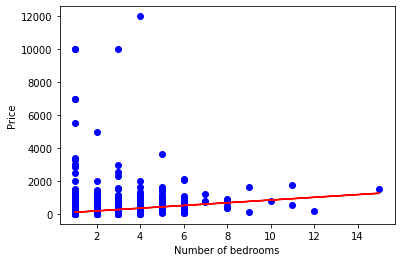

In [127]:
plt.scatter(df['bedrooms'], df['price'], color='blue')
plt.plot(df['bedrooms'], predictions, color='red')
plt.xlabel('Number of bedrooms')
plt.ylabel('Price')
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


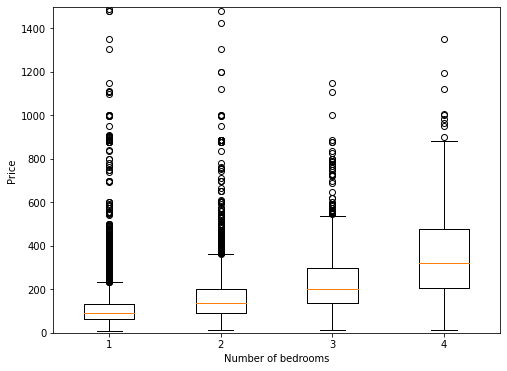

In [141]:
fig, ax = plt.subplots(figsize=(8, 6))
bp = ax.boxplot([df[df['bedrooms'] == n]['price'] for n in range(1, 5)], labels=range(1, 5))
ax.set_ylim(0,1500)
plt.xlabel('Number of bedrooms')
plt.ylabel('Price')
plt.show()